BASİT DOĞRUSAL REGRESYON

In [94]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')

In [4]:
df = df.iloc[:,1:len(df)]

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
!pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 245.8 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.6 kB 363.1 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.6 kB 302.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.6 kB 374.1 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.6 kB 655.1 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.6 kB 655.1 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.6 kB 655.1 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 627.7 kB/s eta 0:00:00


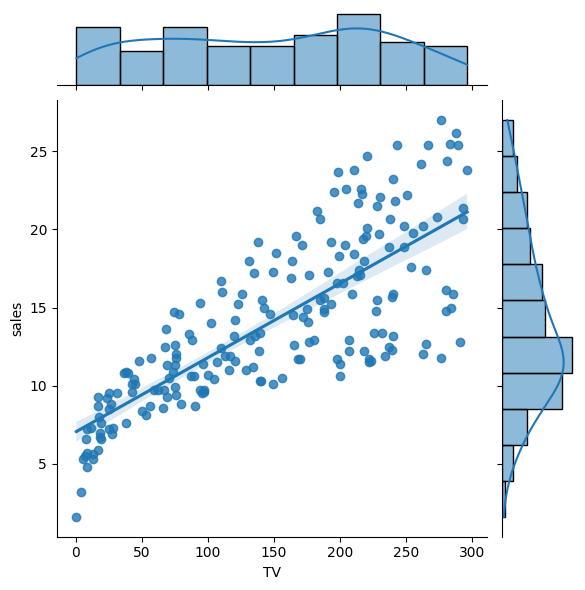

In [11]:
import seaborn as sns
sns.jointplot(x = 'TV', y = 'sales', data = df, kind = 'reg');

In [13]:
from sklearn.linear_model import LinearRegression

In [67]:
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
y = df[['sales']]

In [16]:
reg = LinearRegression()

In [17]:
model = reg.fit(X, y)

In [18]:
model

LinearRegression()

In [19]:
str(model)

'LinearRegression()'

In [23]:
model.intercept_

array([7.03259355])

In [24]:
model.coef_

array([[0.04753664]])

In [26]:
#rkare -- bağımsız değişkenleri kullandığımızda bağımlı değişkendeki değişimin yüzde kaçını açıklayabiliyoruz
model.score(X,y)

0.611875050850071

##TAHMİN

(0.0, 28.27)

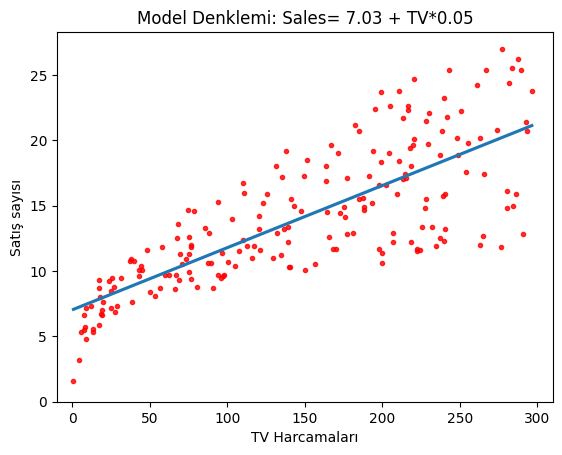

In [46]:
import matplotlib.pyplot as plt
g = sns.regplot(x="TV", y="sales", data=df, ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales= 7.03 + TV*0.05")
g.set_ylabel("Satış sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)

In [48]:
model.intercept_ + model.coef_ * 165

array([[14.87613922]])

In [49]:
model.predict([[165]])

C:\Users\senav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [50]:
yeni_veri = [[5], [15], [30]]

In [51]:
model.predict(yeni_veri)

C:\Users\senav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

MSE: Hata Kareler Ortalaması

RMSE: Hata Kareler Ortalamsını Karekörü

In [52]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [53]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [86]:
gercek_y = y[0:10]

In [87]:
tahmin_y = pd.DataFrame(model.predict(X)[0:10])

In [88]:
 hata = pd.concat([gercek_y, tahmin_y.reset_index(drop=True)], axis=1)

In [89]:
hata.columns= ["gercek_y","tahmin_y"]
hata

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [90]:
hata["hata"] = hata["gercek_y"] - hata["tahmin_y"]

In [97]:
hata

,gercek_y,tahmin_y,hata,hata kareler,hata_kareler
0,22.1,17.970775,4.129225,17.050503,17.050503
1,10.4,9.147974,1.252026,1.567569,1.567569
2,9.3,7.850224,1.449776,2.101851,2.101851
3,18.5,14.234395,4.265605,18.195390,18.195390
4,12.9,15.627218,-2.727218,7.437719,7.437719
5,7.2,7.446162,-0.246162,0.060596,0.060596
6,11.8,9.765950,2.034050,4.137358,4.137358
7,13.2,12.746498,0.453502,0.205664,0.205664
8,4.8,7.441409,-2.641409,6.977040,6.977040
9,10.6,16.530414,-5.930414,35.169814,35.169814


In [100]:
hata["hata_kareler"] = hata["hata"]**2
hata

,gercek_y,tahmin_y,hata,hata kareler,hata_kareler
0,22.1,17.970775,4.129225,17.050503,17.050503
1,10.4,9.147974,1.252026,1.567569,1.567569
2,9.3,7.850224,1.449776,2.101851,2.101851
3,18.5,14.234395,4.265605,18.195390,18.195390
4,12.9,15.627218,-2.727218,7.437719,7.437719
5,7.2,7.446162,-0.246162,0.060596,0.060596
6,11.8,9.765950,2.034050,4.137358,4.137358
7,13.2,12.746498,0.453502,0.205664,0.205664
8,4.8,7.441409,-2.641409,6.977040,6.977040
9,10.6,16.530414,-5.930414,35.169814,35.169814


In [95]:
np.mean(hata["hata kareler"])

9.290350329638102